Import and setup.
Show the first 5 entries of Air-Quality.csv.

In [3]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("Air-Quality.csv")
df.head()

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,75571,1/1/2024,Pittsburgh,NO2_500,9,Good,NaN,NaN
1,75572,1/1/2024,Pittsburgh,PM10_640,10,Good,NaN,NaN
2,75573,1/1/2024,North Braddock,PM25_640,19,Good,NaN,NaN
3,75574,1/1/2024,Parkway East,PM25_640,20,Good,NaN,NaN
4,75575,1/1/2024,Lawrenceville 2,SO2,0,Good,NaN,NaN


Show all possible outcomes for air quality

In [4]:
print((df["description"]).unique())

['Good' 'Moderate' 'Unhealthy for Sensitive Groups']


Display first 5 entries in which air quality is not "Good"

In [5]:
df2 = df[(df['description'] == 'Moderate') | (df['description'] == 'Unhealthy for Sensitive Groups')]
df2.head()

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
131,75724,1/6/2024,Pittsburgh,PM25_640,55,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
159,75763,1/8/2024,North Braddock,PM25_640,57,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
160,75764,1/8/2024,Parkway East,PM25_640,55,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
171,75775,1/8/2024,Avalon,PM25_640,59,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...
172,75776,1/8/2024,Liberty,PM25_640,56,Moderate,Unusually sensitive people should consider red...,Respiratory symptoms possible in unusually sen...


Cutting out unneeded info such as date, index value and parameter. Shortening it down to just site and description

In [6]:
new_df = df2[['site', 'description']]
new_df.head()

,site,description
131,Pittsburgh,Moderate
159,North Braddock,Moderate
160,Parkway East,Moderate
171,Avalon,Moderate
172,Liberty,Moderate


Create a bar graph showing number of reports of moderate air quality or worse

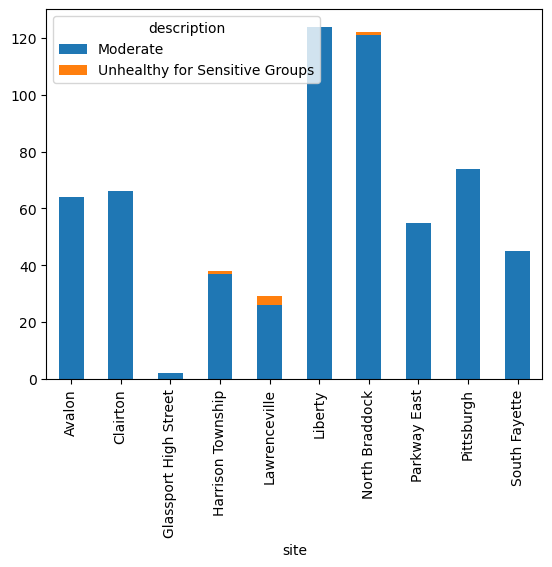

In [9]:
counts = new_df.groupby(['site', 'description']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked = True)
plt.show()

Finally, lets look at the percentage of good readings for each site.

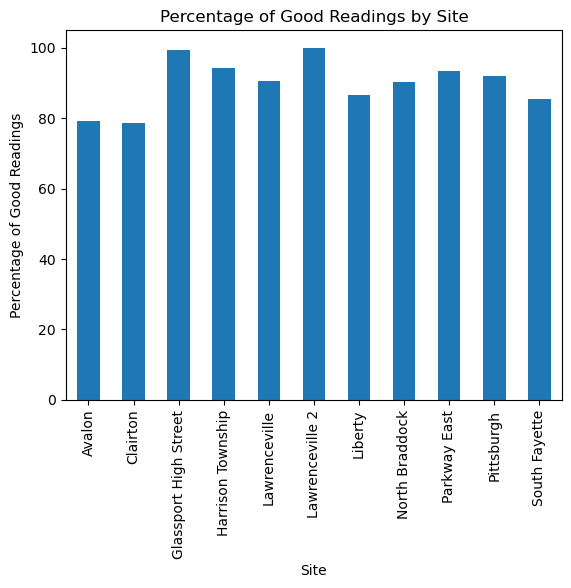

In [10]:
averageAir = df[['site', 'description']]
total_counts = averageAir.groupby('site').size()
good_counts = averageAir[averageAir['description'] == 'Good'].groupby('site').size()
percentage_good = (good_counts / total_counts * 100).fillna(0)
percentage_good.plot(kind='bar')
plt.xlabel('Site')
plt.ylabel('Percentage of Good Readings')
plt.title('Percentage of Good Readings by Site')
plt.show()